#### ***Lecture 04***  | Image Transformation - Perspective

In [7]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

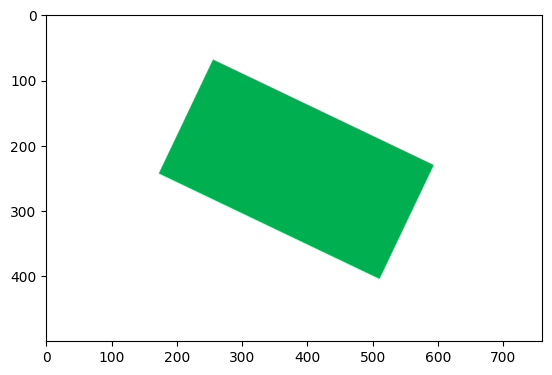

In [12]:
# Load Image
img = cv2.imread('rectangle.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

y, x, color = img.shape
img_size = (x, y)

plt.imshow(img_rgb)

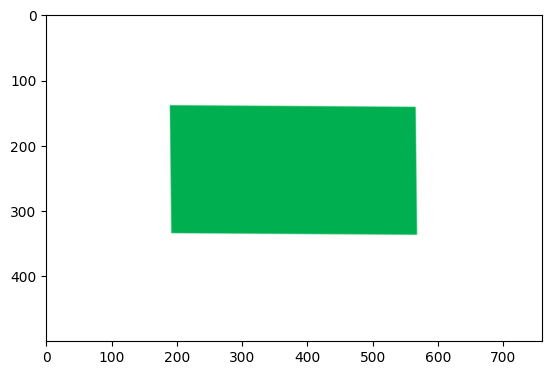

In [22]:
### --- Perspective Transformation: warpAffine ---

# Determine required points, choose three edges
originalPoint = np.float32([(173, 243), (257, 72), (594, 230)])
targetPoint = np.float32([(192, 334), (192, 141), (566, 141)])

# Get transform matrix
# | require float 32 numpy array for the parameter
M = cv2.getAffineTransform(originalPoint, targetPoint)

# Apply transformation
# | borderValue: used for filling background
img_trns = cv2.warpAffine(img_rgb, M, img_size, borderValue=(255, 255, 255))

# Display
plt.imshow(img_trns)


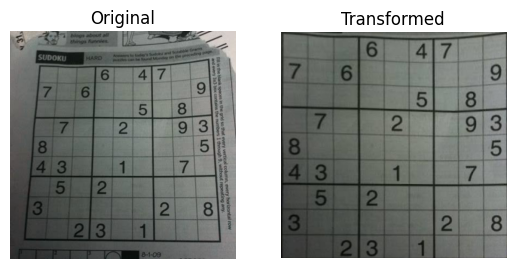

In [35]:
### --- Perspective Transformation: perspectiveAffine ---

# Load Image
img = cv2.imread('sudoku.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
y, x, color = img.shape
img_size = (x, y)

# Gather reference point with external program, like 'paint'
# | we use 4 points from 4 edges
originalPoint = np.float32([(54, 64), (368, 52), (27, 385), (388, 389)])
targetPoint = np.float32([(0,0), (300, 0), (0, 300), (300, 300)])

# Get transform matrix
M = cv2.getPerspectiveTransform(originalPoint, targetPoint)

# Apply transform
# | you can resize the image at 'dsize' argument 
img_trns = cv2.warpPerspective(img_rgb, M, (300, 300))


# Dispaly
plt.figure()

# Display the first image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')  # Turn off axis numbers and labels

# Display the second image
plt.subplot(1, 2, 2)
plt.imshow(img_trns)
plt.title('Transformed')
plt.axis('off')

# Show the plot
plt.show()



#### ***Lecture 04***  | Resize & Crop

(960, 720)


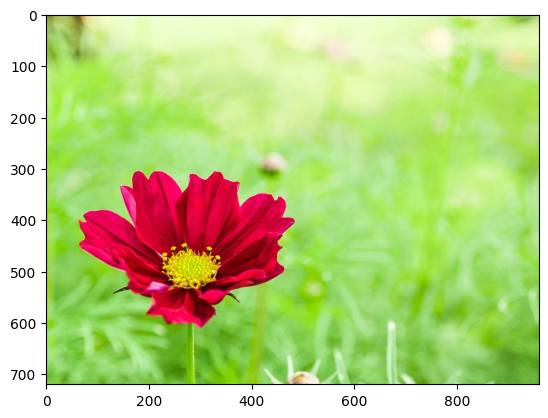

In [38]:
# Load Image
img = cv2.imread('flower.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

y, x, color = img.shape
img_size = (x, y)
print(img_size)

plt.imshow(img_rgb)

In [45]:
### --- Resize ---
# | use to change image resolution not scale


# Sol 1 
# | you can use x & y factor to resize the image - can be float
# | put the 'dsize' as none
res1 = cv2.resize(img_rgb, None, fx= 2.5, fy= 2.5)
print(res1.shape)


# Sol 2
# | get the image shape and douplicate it
# | make sure that the resultant size is a integer
y, x, c = img.shape
res2 = cv2.resize(img_rgb, (int(x * 2.5), int(y * 2.5)))
print(res2.shape)

(1800, 2400, 3)
(1800, 2400, 3)


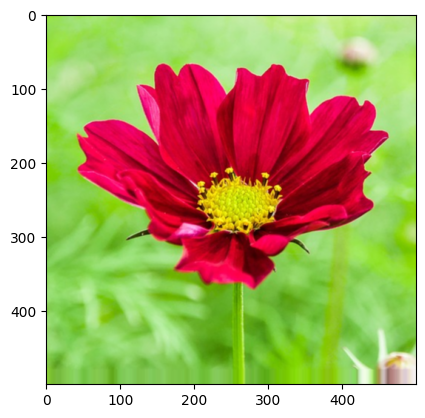

In [48]:
### --- Crop Image ---

# use getRectPix
# params
# | img_mat
# | cropped size
# | center point of image
res3 = cv2.getRectSubPix(img_rgb, (500, 500), (271, 488))

plt.imshow(res3)